# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

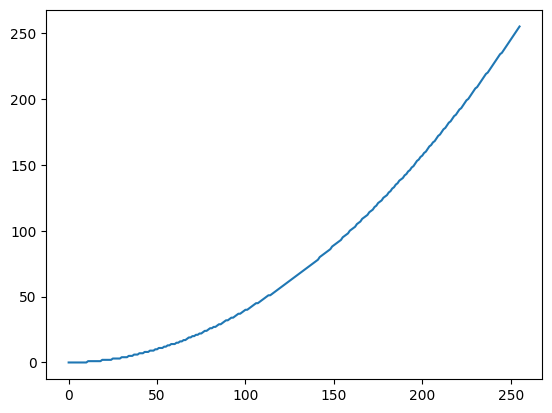

In [3]:
import lut

plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

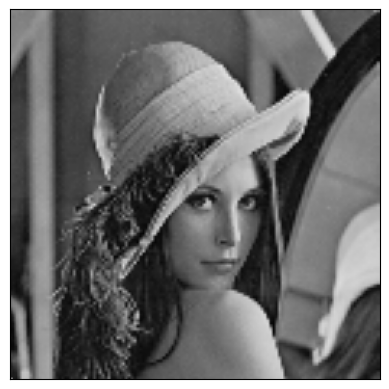

In [4]:
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread("lena.bmp")
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

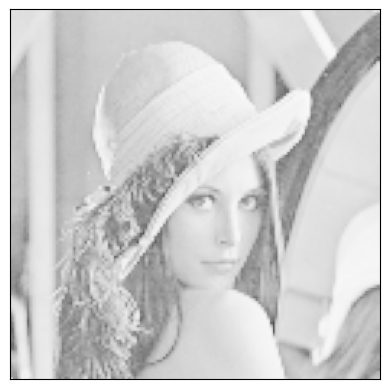

In [5]:
I_log = cv2.LUT(I,lut.log)
plt.imshow(I_log)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(image, table):
    image_LUT = cv2.LUT(image,table)
    f, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1.plot(table)
    ax1.set_aspect('equal')
    ax1.set_xticks([]), ax1.set_yticks([])
    ax1.set_title('LUT')

    ax2.imshow(image)
    ax2.set_xticks([]), ax2.set_yticks([])
    ax2.set_title('Oryginał')
    
    ax3.imshow(image_LUT)
    ax3.set_xticks([]), ax3.set_yticks([])
    ax3.set_title('Przekształcony')

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

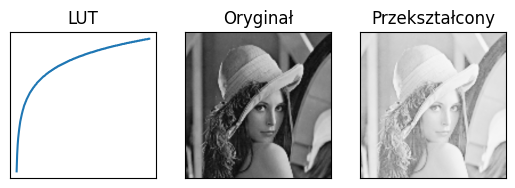

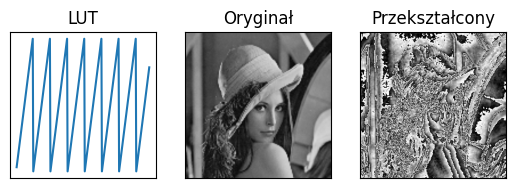

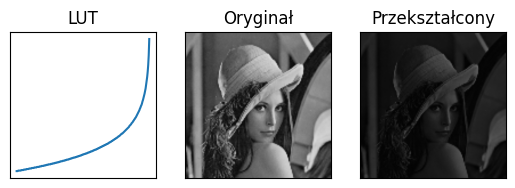

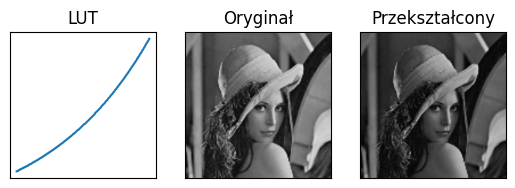

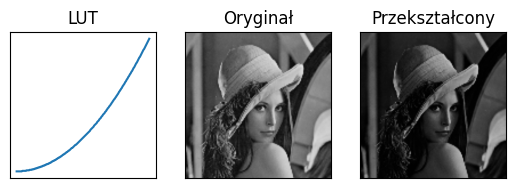

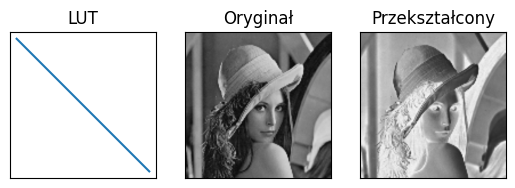

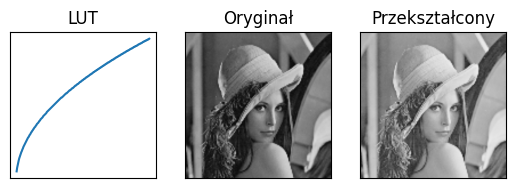

In [7]:

LUT(I,lut.log)
LUT(I,lut.pila)
LUT(I,lut.odwlog)
LUT(I,lut.wykladnicza)
LUT(I,lut.kwadratowa)
LUT(I,lut.odwrotna)
LUT(I,lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

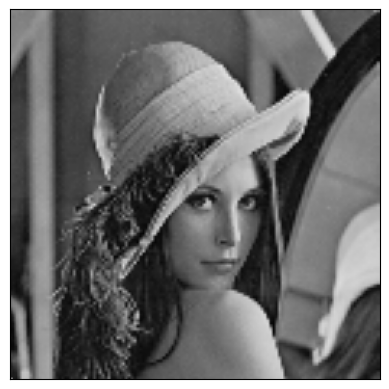

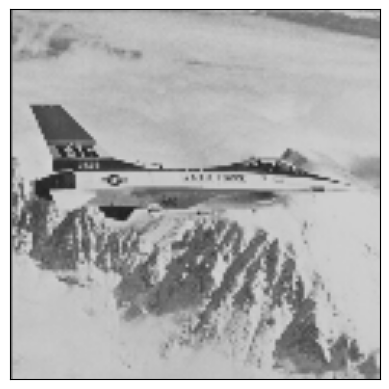

In [8]:
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

I_lena = cv2.imread("lena.bmp")
I_jet = cv2.imread("jet.bmp")

plt.imshow(I_lena)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(I_jet)
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

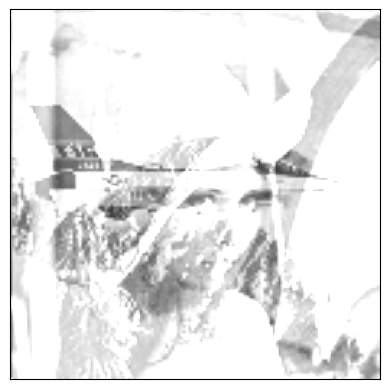

In [9]:
I_add = cv2.add(I_lena,I_jet)
plt.imshow(I_add)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

Z obrazu uzyskanego w wyniku sumowania nie możemy uzyskać żadnej sensownej informacji. Wygląda on na prześwietlony obraz. Wynika to z faktu, że po dodaniu dwóch liczb możemy uzyskać wartość większą niż 255. Wówczas program traktuje taką wartość jak 255, co skutkuje dużą ilością białych pikseli.  

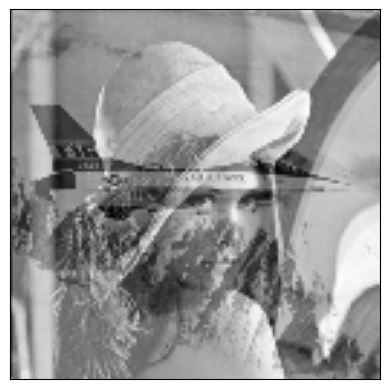

In [10]:
I_add = cv2.add(I_lena.astype('uint16'),I_jet.astype('uint16'))
cv2.normalize(I_add,I_add, 0, 255, cv2.NORM_MINMAX)
I_add = I_add.astype('uint8')
plt.imshow(I_add)
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

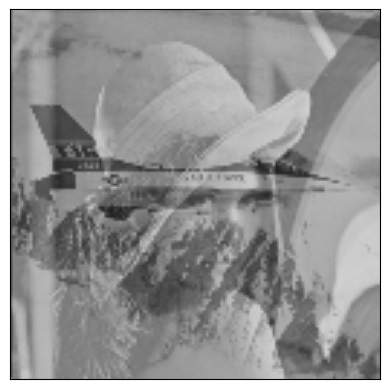

In [11]:
for alpha in [0.3,0.5,0.7,0.4]:
    beta = 1 - alpha
    I_comb = cv2.addWeighted(I_lena,alpha,I_jet,beta,0.0)
    
plt.imshow(I_comb)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

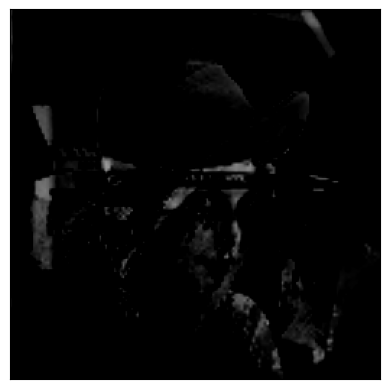

In [12]:
I_sub = cv2.subtract(I_lena,I_jet)
plt.imshow(I_sub)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

Obraz uzyskany za pomocą odejmowania również nie przekauzje żadnej informacji. Analogicznie do wyniku sumowania, po odjęciu dwóch liczb możliwe jest osiągnięcie wartości mniejszej niż 0. Wówczas program traktuje taką wartość jak czarny punkt (0).

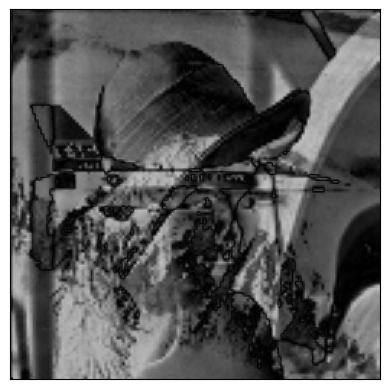

In [13]:
I_sub = np.abs(cv2.subtract(I_lena.astype('int16'),I_jet.astype('int16')))
plt.imshow(I_sub)
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


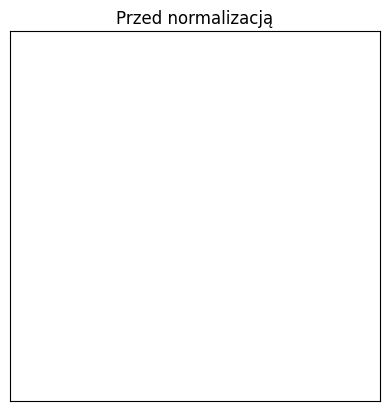

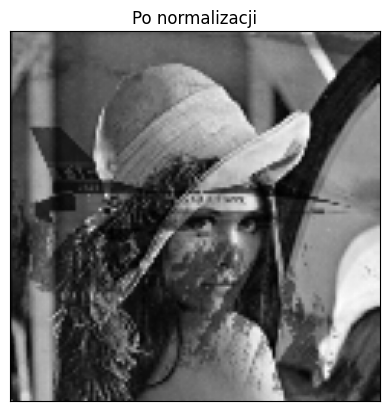

In [14]:
I_mul = cv2.multiply(I_lena.astype('uint16'),I_jet.astype('uint16'))
plt.imshow(I_mul)
plt.title("Przed normalizacją")
plt.xticks([]), plt.yticks([])
plt.show()

cv2.normalize(I_mul,I_mul, 0, 255, cv2.NORM_MINMAX)
plt.imshow(I_mul)
plt.title("Po normalizacji")
plt.xticks([]), plt.yticks([])
plt.show()

Przed wykonaniem mnożenia należy zmienić format z 'uint8' na 'uint16', ponieważ w wyniku mnożenia dostajemy duże liczby, które mogą spowodować przepełnienie. <br>
Przed normalizacją wartości uzyskane w wyniku mnożenia są większe niż 255, więc program traktuje je jak białe piksele. Po normalizcji uzyskujemy obraz, który można już interpretować.

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

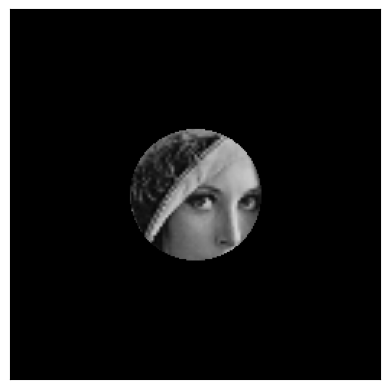

In [15]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

maska = cv2.imread("kolo.bmp")
maska = maska.astype('bool').astype('uint8')
I_maska = cv2.multiply(I_lena,maska)

plt.imshow(I_maska)
plt.xticks([]), plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

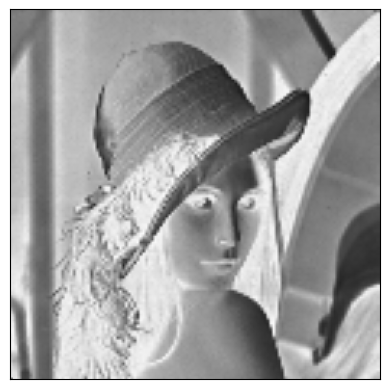

In [16]:
lena_cv = cv2.bitwise_not(I_lena)
lena_lut = cv2.LUT(I_lena,lut.odwrotna)

plt.imshow(lena_cv)
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

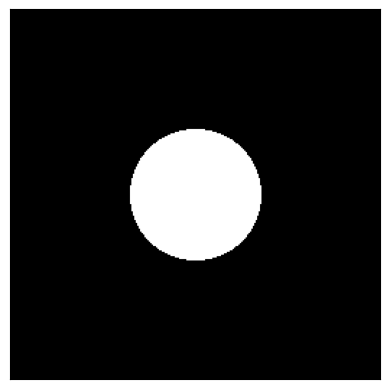

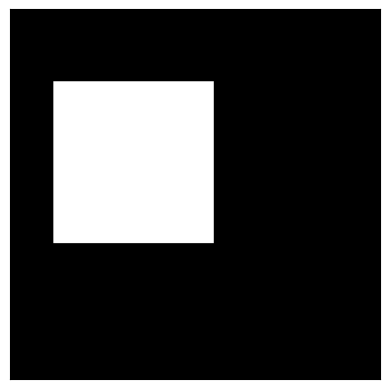

In [17]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kolo = cv2.imread("kolo.bmp")
plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()

kwadrat = cv2.imread("kwadrat.bmp")
plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()


Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

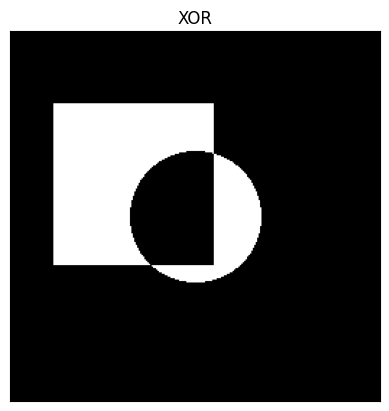

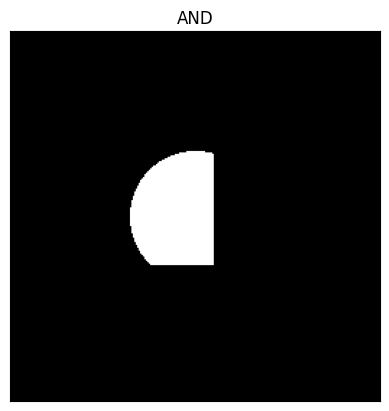

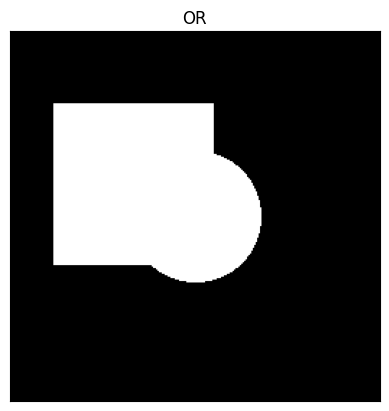

In [18]:
I_xor = cv2.bitwise_xor(kolo,kwadrat)
plt.imshow(I_xor)
plt.title("XOR")
plt.xticks([]), plt.yticks([])
plt.show()

I_and = cv2.bitwise_and(kolo,kwadrat)
plt.imshow(I_and)
plt.title("AND")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(kwadrat|kolo)
plt.title("OR")
plt.xticks([]), plt.yticks([])
plt.show()